# **Exame - Introdução ao Processamento Digital de Imagens**
##Nome: Gabriela Jachs Stepien

#**Questão 3)**

Com o código desenvolvido por você em python (será preciso utilizar SEU código da convolução) utilize a técnica de aguçamento e realce as bordas da imagem; Plote as imagens resultantes do processo de filtragem. Comente os resultados obtidos.

Imagem: fig3.59

In [3]:
#Importação das bibliotecas necessárias
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

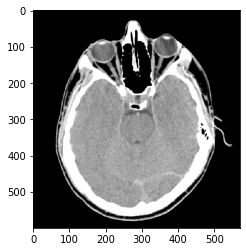

In [4]:
#Passando uma imagem para a variável onde ela poderá ser lida
img_c=cv2.imread("/content/Fig0359(a)(headCT_Vandy).tif")
img_c=cv2.cvtColor(img_c, cv2.COLOR_BGR2GRAY)
plt.imshow(img_c, cmap='gray') #Plotando a imagem escolhida pela biblioteca do matplotlib
imagem_array=np.array(img_c) #Imagem convertida para um numpy.array

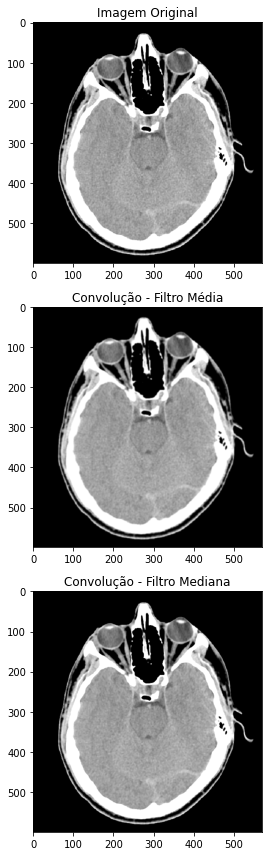

In [5]:
"""A filtragem de convolução é usada para modificar 
as características de frequência espacial de uma imagem.
Ele funciona determinando o valor de um pixel central 
adicionando os valores ponderados de todos os seus 
vizinhos para calcular o novo valor do pixel na imagem de saída. 
Os valores de pixel na imagem de saída são calculados 
percorrendo a janela do kernel através da imagem de entrada"""

def convolucao(img_c, w):
    borda = (w.shape[0]-1)//2
    altura, largura = img_c.shape
    img_saida = np.zeros((altura, largura)) #declarando a saída da função da convolução
    w = w[::-1,::-1] #rotação do kernel p/ convolução

    for x in range(borda, altura-borda):
        for y in range(borda, largura-borda):
            img_saida[x,y] = np.ceil(np.sum(img_c[x-borda:x+borda+1, y-borda:y+borda+1]*w))
    return img_saida

def filtro_mediana(img_c, tamanho_kernel): #uso do filtro mediana 
    borda = (tamanho_kernel-1)//2
    altura, largura = img_c.shape
    img_saida = np.zeros((altura, largura)) #declarando a saída do filtro mediana

    for x in range(borda, altura-borda):
        for y in range(borda, largura-borda):
            img_saida[x,y] = np.median(img_c[x-borda:x+borda+1, y-borda:y+borda+1])
    return img_saida

#declarando os filtros que vão ser utilizados, como o filtro média e o filtro mediana
#e plotando a comparação entre os filtros média e mediana
n = 3
kernel_media = np.ones((n,n))/(n**2)

plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
plt.title("Imagem Original")
plt.imshow(img_c, cmap="gray", vmin=0, vmax=255)

plt.subplot(3,3,4)
plt.title("Convolução - Filtro Média")
plt.imshow(convolucao(img_c, kernel_media), cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,7)
plt.title("Convolução - Filtro Mediana")
plt.imshow(filtro_mediana(img_c, n), cmap='gray', vmin=0, vmax=255)


plt.tight_layout()

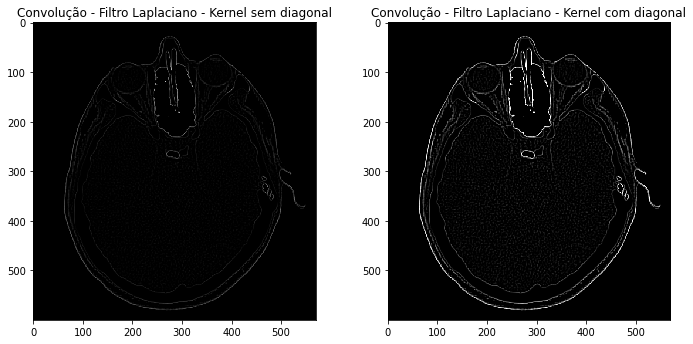

In [6]:
#Uso do filtro laplaciano
kernel_laplace = np.array([[ 0,-1, 0],
                           [-1, 4,-1],
                           [ 0,-1, 0]])

#Uso do filtro laplaciano de segunda ordem para ter uma melhor visualização
kernel_laplace_diag = np.array([[-1,-1,-1],
                                [-1, 8,-1],
                                [-1,-1,-1]])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Convolução - Filtro Laplaciano - Kernel sem diagonal')
plt.imshow(convolucao(img_c, kernel_laplace), cmap='gray', vmin=0, vmax=255)
#mantendo os parâmetros de vmáxima e vmínima para que não ocorra uma má deformação da convolução 
plt.subplot(1,2,2)
plt.title('Convolução - Filtro Laplaciano - Kernel com diagonal')
plt.imshow(convolucao(img_c, kernel_laplace_diag), cmap='gray', vmin=0, vmax=255)
plt.tight_layout()